In [1]:
%load_ext autoreload
%autoreload 2

In [52]:
import cv2 as cv
import numpy as np
from utils.io_utils import get_cam_images, draw_detections
from utils.calib_utils import detect_keypoints, check_orientation

In [4]:
pattern_size = (8, 6)
edge_length = 1.0
data_path0 = "/home/konstantin/datasets/bandeja-sequence/2020-11-17-18-52-32-chess/camera0"

In [5]:
images0 = get_cam_images(data_path0, 4)

In [6]:
len(images0)

45

In [7]:
results0 = detect_keypoints(images0, pattern_size)

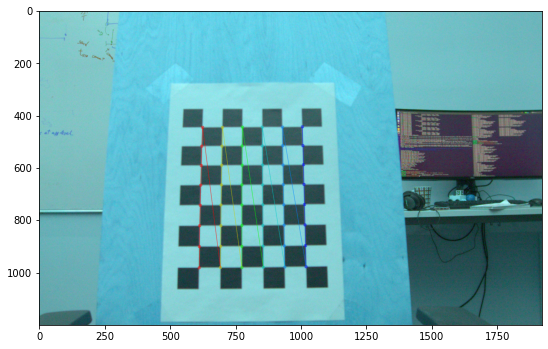

In [51]:
draw_detections(images0, results0, pattern_size, 0)

In [63]:
basler0_intrinsincs = np.load('calib_output/basler0_intrinsincs.npy', allow_pickle=True).item()

In [64]:
intrinsics0 = basler0_intrinsincs['intrinsics']
dist_coeff0 = basler0_intrinsincs['dist_coeff']

In [65]:
scene_points0, loc_kp0 = check_orientation(results0, list(results0.values())[0][1], pattern_size, 70.0)

In [109]:
camera_scene_points = []

In [111]:
num_points = pattern_size[0] * pattern_size[1]

for scene_points, loc_kp in zip(scene_points0, loc_kp0):
    success, r, t = cv.solvePnP(scene_points, loc_kp, intrinsics0, dist_coeff0, flags=cv.SOLVEPNP_IPPE)
    
    if success:
        T = np.zeros((4, 4))
        T[:3, :3] = cv.Rodrigues(r)[0]
        T[:3, 3] = np.reshape(t, -1)
        T[3, 3] = 1
        
        scene_points_h = np.concatenate((scene_points, np.ones((num_points, 1))), axis=-1)
        transformed_points = (T @ scene_points_h.transpose()).transpose()[:, :3]
        
        camera_scene_points.append(transformed_points)


In [114]:
np.save('check', camera_scene_points)
